In [1]:
import numpy as np
import matplotlib
from matplotlib import transforms, pyplot as plt

%matplotlib inline
#%matplotlib

In [2]:
# 색상정의
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# 플롯 폰트 패밀리를 Arial로 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 수학 텍스트 굵게 및 이탤릭체 폰트 패밀리를 Arial로 설정
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'NanumGothic:bold'
matplotlib.rcParams['mathtext.it'] = 'NanumGothic:italic'

In [4]:
# 세그먼트 분포
X = ['세그먼트 ' + str(i) for i in range(1, 8)]
Y = [16, 7,  10, 10, 10, 32, 15] # 미국 인구
Z = [9,  10, 15, 18, 17, 20, 11] # 우리 고객

Text(1.33, 41.5, '50%')

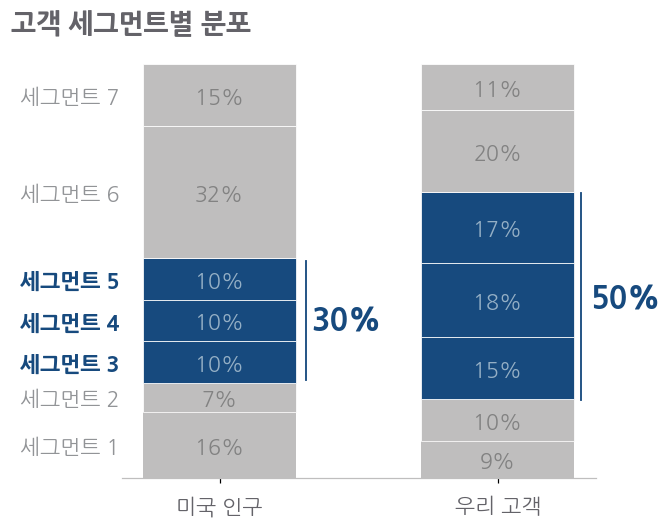

In [9]:
# 새로운 그림 생성
fig, ax1 = plt.subplots(figsize=(7, 5), # 가로, 세로 크기 (인치 단위)
                        dpi=110)        # 그림의 해상도

# 그림의 여백 설정
fig.subplots_adjust(left=0.154, right=0.77, top=0.89, bottom=0.1)

# 막대 그래프를 그릴 때 사용할 색상, 숫자 라벨 및 이름 라벨링
C = [GRAY9] * 2 + [BLUE1] * 3 + [GRAY9] * 2
CT = [GRAY6] * 2 + [BLUE4] * 3 + [GRAY6] * 2
CL = [GRAY7] * 2 + [BLUE1] * 3 + [GRAY7] * 2

# 쌓인 막대 그래프 그리기
bottom = np.array([0, 0])  # 맨 아래 시작점을 누적
for i in range(len(X)):
    bars = plt.bar([0, 1],
                   [Y[i], Z[i]],
                   bottom=bottom,  # 쌓기 위한 것
                   color=C[i],
                   # 흰색 테두리용
                   edgecolor=('white', 'none')[i == 0],
                   linewidth=0.5,
                   width=0.55)  # 간격을 넓힘

    ax1.text(-0.36,
             Y[i] / 2 + bottom[0] - 1.9,
             X[i],
             fontsize=14,
             horizontalalignment='right',
             color=CL[i],
             # 파란색 텍스트에는 굵은체 사용
             fontweight=('normal', 'bold')[CL[i] == BLUE1])
    # 각 막대에 대한 숫자 데이터 라벨 추가
    for bi, b in enumerate(bars):
        value = (Y[i], Z[i])[int(b.get_x() > 0)]  # 왼쪽 막대냐 오른쪽 막대냐
        ax1.text(b.get_x() + b.get_width() / 2,  # 막대의 x 중심
                 b.get_y() + b.get_height() / 2 - 1.9,  # 막대의 y 중심
                 str(value) + '%',  # % 포함한 값
                 fontsize=14,
                 horizontalalignment='center',
                 color=CT[i])

    bottom += np.array([Y[i], Z[i]])

# 눈금, 눈금 라벨 및 그리드 라인의 모양 변경
ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='on')

# 차트 테두리 제거
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# x축의 범주 눈금 위치와 라벨 설정
plt.xticks([0, 1], ['미국 인구', '우리 고객'])

# 응답 라벨 모양 변경
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY4)
    # x축 라벨을 약간 아래로 이동하도록 변환 사용
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# remove yticks
ax1.set_yticks([])  # yticks 생략
    
# 아래 테두리 색상 설정
ax1.spines['bottom'].set_color(GRAY9)

# 그래프 제목
ax1.text(-0.75, 108, '고객 세그먼트별 분포', color=GRAY4, weight='bold',
         fontsize=17.4)

# 수직 참조선 추가
ax1.axvline(0.31, ymin=0.225, ymax=0.5, color=BLUE1, linewidth=1.2)
ax1.axvline(1.3, ymin=0.18, ymax=0.655, color=BLUE1, linewidth=1.2)

# 참조선에 텍스트 추가
ax1.text(0.33, 36, '30%', fontweight='bold', fontsize=20, color=BLUE1)
ax1.text(1.33, 41.5, '50%', fontweight='bold', fontsize=20, color=BLUE1)
